In [1]:
import requests
import bs4 as bs
import pandas as pd
import numpy as np
import warnings
import re
import datetime
import time
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function, division, absolute_import #make compatible with Python 2 and Python 3

In [52]:
from lxml import html
import requests
record = pd.DataFrame()
for i in range(0,500):
    post=[]
    date=[]
    page = requests.get("https://www.coindesk.com/category/technology-news/bitcoin/")
    
    tree = html.fromstring(page.content)
    soup = bs.BeautifulSoup("html.parser")
    content = tree.xpath('//p[@class="desc"]/text()')
    date_time = tree.xpath('//p[@class="timeauthor"]/text()')
    for x in range(len(content)):
        post.append(re.sub(r'\s+', ' ', content[x]))
        date.append(re.sub(r'\s+',' ',date_time[x]))
    if (i+1)%25 == 0:
        print('{} pages completed!'.format(i+1))
    t1 = pd.Series(date)
    t2 = pd.Series(post)
    temp_record = pd.concat([t1,t2],axis=1)
    record = pd.concat([record,temp_record]).reset_index(drop=True)

25 pages completed!
50 pages completed!
75 pages completed!
100 pages completed!
125 pages completed!
150 pages completed!
175 pages completed!
200 pages completed!
225 pages completed!
250 pages completed!
275 pages completed!
300 pages completed!
325 pages completed!
350 pages completed!
375 pages completed!
400 pages completed!
425 pages completed!
450 pages completed!
475 pages completed!
500 pages completed!


In [53]:
record.head(25)

,0,1
0,|,One of the developers behind the Drivechain pr...
1,|,"Announced on Tuesday, Circle will be launching..."
2,|,Sorting the signal from the noise may be harde...
3,|,Researchers are trying to improve prediction m...
4,|,Online banking service Swissquote has launched...
5,|,Billionaire Mike Novogratz has restated his be...
6,|,"Often trumpeted as the future of bitcoin, the ..."
7,|,The Segwit2x bitcoin fork may have been formal...
8,|,Swiss bank Vontobel and Leonteq Securities ann...
9,|,Bitcoin's astonishing price rally this year co...


In [54]:
record = record.rename(columns = {0:'Date',1:'Post'})

In [55]:
record.drop('Date',axis=1, inplace=True)

In [56]:
record.head()

,Post
0,One of the developers behind the Drivechain pr...
1,"Announced on Tuesday, Circle will be launching..."
2,Sorting the signal from the noise may be harde...
3,Researchers are trying to improve prediction m...
4,Online banking service Swissquote has launched...


In [61]:
lists=record['Post'].tolist()

In [62]:
lists

["One of the developers behind the Drivechain project for bringing sidechains to bitcoin is seeking feedback on the project's code.",
 'Announced on Tuesday, Circle will be launching a digital investment and storage product for a variety of cryptocurrencies in 2018. ',
 'Sorting the signal from the noise may be harder in the cryptocurrency space than almost anywhere else.',
 'Researchers are trying to improve prediction markets as potentially valuable tools for measuring community support or opposition to protocol changes.',
 "Online banking service Swissquote has launched a bitcoin exchange-traded certificate that it claims will curb the cryptocurrency's volatility.",
 'Billionaire Mike Novogratz has restated his belief that bitcoin will end the year at $10,000, while ethereum could hit $500.',
 'Often trumpeted as the future of bitcoin, the success of the Lightning Network may come down to economic forces, say researchers.',
 'The Segwit2x bitcoin fork may have been formally called o

In [50]:
uniqueVals = record["Post"].unique()


In [51]:
uniqueVals

array(['How does bitcoin affect your life?', '1512297948',
       'Both positively and negatively.',
       "Positively, it gave me decent knowledge on economics, how money in general works, and a bit on market analysis; and of course, don't forget of all the profit we make by investing. Also, I could actually call myself an investor even though I don't actually have a huge bankroll.",
       'Negatively, I spend a lot of time refreshing blockfolio.. ',
       "It gives me something to invest in, a new form of currency, and some technology to research into. It's basically an amazing futuristic idea that has been placed in our world right now and is flourishing. Personally, bitcoin is an investment for me as well as a constant stream of income especially through these forums. I have a lot of love for bitcoin, but don't take this as any indication of what I think the price may be. I wish I could predict the price, but I guess everyone can wish to fly even though we don't have wings.",
  

In [58]:
import math, re, string, requests, json
from itertools import product
from inspect import getsourcefile
from os.path import abspath, join, dirname

##Constants##

# (empirically derived mean sentiment intensity rating increase for booster words)
B_INCR = 0.293
B_DECR = -0.293

# (empirically derived mean sentiment intensity rating increase for using
# ALLCAPs to emphasize a word)
C_INCR = 0.733

N_SCALAR = -0.74

# for removing punctuation
REGEX_REMOVE_PUNCTUATION = re.compile('[%s]' % re.escape(string.punctuation))

PUNC_LIST = [".", "!", "?", ",", ";", ":", "-", "'", "\"",
             "!!", "!!!", "??", "???", "?!?", "!?!", "?!?!", "!?!?"]
NEGATE = \
["aint", "arent", "cannot", "cant", "couldnt", "darent", "didnt", "doesnt",
 "ain't", "aren't", "can't", "couldn't", "daren't", "didn't", "doesn't",
 "dont", "hadnt", "hasnt", "havent", "isnt", "mightnt", "mustnt", "neither",
 "don't", "hadn't", "hasn't", "haven't", "isn't", "mightn't", "mustn't",
 "neednt", "needn't", "never", "none", "nope", "nor", "not", "nothing", "nowhere",
 "oughtnt", "shant", "shouldnt", "uhuh", "wasnt", "werent",
 "oughtn't", "shan't", "shouldn't", "uh-uh", "wasn't", "weren't",
 "without", "wont", "wouldnt", "won't", "wouldn't", "rarely", "seldom", "despite"]

# booster/dampener 'intensifiers' or 'degree adverbs'
# http://en.wiktionary.org/wiki/Category:English_degree_adverbs

BOOSTER_DICT = \
{"absolutely": B_INCR, "amazingly": B_INCR, "awfully": B_INCR, "completely": B_INCR, "considerably": B_INCR,
 "decidedly": B_INCR, "deeply": B_INCR, "effing": B_INCR, "enormously": B_INCR,
 "entirely": B_INCR, "especially": B_INCR, "exceptionally": B_INCR, "extremely": B_INCR,
 "fabulously": B_INCR, "flipping": B_INCR, "flippin": B_INCR,
 "fricking": B_INCR, "frickin": B_INCR, "frigging": B_INCR, "friggin": B_INCR, "fully": B_INCR, "fucking": B_INCR,
 "greatly": B_INCR, "hella": B_INCR, "highly": B_INCR, "hugely": B_INCR, "incredibly": B_INCR,
 "intensely": B_INCR, "majorly": B_INCR, "more": B_INCR, "most": B_INCR, "particularly": B_INCR,
 "purely": B_INCR, "quite": B_INCR, "really": B_INCR, "remarkably": B_INCR,
 "so": B_INCR, "substantially": B_INCR,
 "thoroughly": B_INCR, "totally": B_INCR, "tremendously": B_INCR,
 "uber": B_INCR, "unbelievably": B_INCR, "unusually": B_INCR, "utterly": B_INCR,
 "very": B_INCR,
 "almost": B_DECR, "barely": B_DECR, "hardly": B_DECR, "just enough": B_DECR,
 "kind of": B_DECR, "kinda": B_DECR, "kindof": B_DECR, "kind-of": B_DECR,
 "less": B_DECR, "little": B_DECR, "marginally": B_DECR, "occasionally": B_DECR, "partly": B_DECR,
 "scarcely": B_DECR, "slightly": B_DECR, "somewhat": B_DECR,
 "sort of": B_DECR, "sorta": B_DECR, "sortof": B_DECR, "sort-of": B_DECR}

# check for special case idioms using a sentiment-laden keyword known to VADER
SPECIAL_CASE_IDIOMS = {"the shit": 3, "the bomb": 3, "bad ass": 1.5, "yeah right": -2,
                       "cut the mustard": 2, "kiss of death": -1.5, "hand to mouth": -2}


##Static methods##

def negated(input_words, include_nt=True):
    """
    Determine if input contains negation words
    """
    neg_words = []
    neg_words.extend(NEGATE)
    for word in neg_words:
        if word in input_words:
            return True
    if include_nt:
        for word in input_words:
            if "n't" in word:
                return True
    if "least" in input_words:
        i = input_words.index("least")
        if i > 0 and input_words[i-1] != "at":
            return True
    return False


def normalize(score, alpha=15):
    """
    Normalize the score to be between -1 and 1 using an alpha that
    approximates the max expected value
    """
    norm_score = score/math.sqrt((score*score) + alpha)
    if norm_score < -1.0: 
        return -1.0
    elif norm_score > 1.0:
        return 1.0
    else:
        return norm_score


def allcap_differential(words):
    """
    Check whether just some words in the input are ALL CAPS
    :param list words: The words to inspect
    :returns: `True` if some but not all items in `words` are ALL CAPS
    """
    is_different = False
    allcap_words = 0
    for word in words:
        if word.isupper():
            allcap_words += 1
    cap_differential = len(words) - allcap_words
    if cap_differential > 0 and cap_differential < len(words):
        is_different = True
    return is_different


def scalar_inc_dec(word, valence, is_cap_diff):
    """
    Check if the preceding words increase, decrease, or negate/nullify the
    valence
    """
    scalar = 0.0
    word_lower = word.lower()
    if word_lower in BOOSTER_DICT:
        scalar = BOOSTER_DICT[word_lower]
        if valence < 0:
            scalar *= -1
        #check if booster/dampener word is in ALLCAPS (while others aren't)
        if word.isupper() and is_cap_diff:
            if valence > 0:
                scalar += C_INCR
            else: scalar -= C_INCR
    return scalar

class SentiText(object):
    """
    Identify sentiment-relevant string-level properties of input text.
    """
    def __init__(self, text):
        if not isinstance(text, str):
            text = str(text.encode('utf-8'))
        self.text = text
        self.words_and_emoticons = self._words_and_emoticons()
        # doesn't separate words from\
        # adjacent punctuation (keeps emoticons & contractions)
        self.is_cap_diff = allcap_differential(self.words_and_emoticons)

    def _words_plus_punc(self):
        """
        Returns mapping of form:
        {
            'cat,': 'cat',
            ',cat': 'cat',
        }
        """
        no_punc_text = REGEX_REMOVE_PUNCTUATION.sub('', self.text)
        # removes punctuation (but loses emoticons & contractions)
        words_only = no_punc_text.split()
        # remove singletons
        words_only = set( w for w in words_only if len(w) > 1 )
        # the product gives ('cat', ',') and (',', 'cat')
        punc_before = {''.join(p): p[1] for p in product(PUNC_LIST, words_only)}
        punc_after = {''.join(p): p[0] for p in product(words_only, PUNC_LIST)}
        words_punc_dict = punc_before
        words_punc_dict.update(punc_after)
        return words_punc_dict

    def _words_and_emoticons(self):
        """
        Removes leading and trailing puncutation
        Leaves contractions and most emoticons
            Does not preserve punc-plus-letter emoticons (e.g. :D)
        """
        wes = self.text.split()
        words_punc_dict = self._words_plus_punc()
        wes = [we for we in wes if len(we) > 1]
        for i, we in enumerate(wes):
            if we in words_punc_dict:
                wes[i] = words_punc_dict[we]
        return wes

class SentimentIntensityAnalyzer(object):
    """
    Give a sentiment intensity score to sentences.
    """
    def __init__(self, lexicon_file="vader_lexicon.txt"):
        _this_module_file_path_ = abspath(getsourcefile(lambda:0))
        lexicon_full_filepath = join(dirname(_this_module_file_path_), lexicon_file)
        with open(lexicon_full_filepath, encoding='utf-8') as f:
            self.lexicon_full_filepath = f.read()
        self.lexicon = self.make_lex_dict()

    def make_lex_dict(self):
        """
        Convert lexicon file to a dictionary
        """
        lex_dict = {}
        for line in self.lexicon_full_filepath.split('\n'):
            (word, measure) = line.strip().split('\t')[0:2]
            lex_dict[word] = float(measure)
        return lex_dict

    def polarity_scores(self, text):
        """
        Return a float for sentiment strength based on the input text.
        Positive values are positive valence, negative value are negative
        valence.
        """
        sentitext = SentiText(text)
        #text, words_and_emoticons, is_cap_diff = self.preprocess(text)

        sentiments = []
        words_and_emoticons = sentitext.words_and_emoticons
        for item in words_and_emoticons:
            valence = 0
            i = words_and_emoticons.index(item)
            if (i < len(words_and_emoticons) - 1 and item.lower() == "kind" and \
                words_and_emoticons[i+1].lower() == "of") or \
                item.lower() in BOOSTER_DICT:
                sentiments.append(valence)
                continue

            sentiments = self.sentiment_valence(valence, sentitext, item, i, sentiments)

        sentiments = self._but_check(words_and_emoticons, sentiments)
        
        valence_dict = self.score_valence(sentiments, text)

        return valence_dict

    def sentiment_valence(self, valence, sentitext, item, i, sentiments):
        is_cap_diff = sentitext.is_cap_diff
        words_and_emoticons = sentitext.words_and_emoticons
        item_lowercase = item.lower()
        if item_lowercase in self.lexicon:
            #get the sentiment valence
            valence = self.lexicon[item_lowercase]

            #check if sentiment laden word is in ALL CAPS (while others aren't)
            if item.isupper() and is_cap_diff:
                if valence > 0:
                    valence += C_INCR
                else:
                    valence -= C_INCR

            for start_i in range(0,3):
                if i > start_i and words_and_emoticons[i-(start_i+1)].lower() not in self.lexicon:
                    # dampen the scalar modifier of preceding words and emoticons
                    # (excluding the ones that immediately preceed the item) based
                    # on their distance from the current item.
                    s = scalar_inc_dec(words_and_emoticons[i-(start_i+1)], valence, is_cap_diff)
                    if start_i == 1 and s != 0:
                        s = s*0.95
                    if start_i == 2 and s != 0:
                        s = s*0.9
                    valence = valence+s
                    valence = self._never_check(valence, words_and_emoticons, start_i, i)
                    if start_i == 2:
                        valence = self._idioms_check(valence, words_and_emoticons, i)

                        # future work: consider other sentiment-laden idioms
                        # other_idioms =
                        # {"back handed": -2, "blow smoke": -2, "blowing smoke": -2,
                        #  "upper hand": 1, "break a leg": 2,
                        #  "cooking with gas": 2, "in the black": 2, "in the red": -2,
                        #  "on the ball": 2,"under the weather": -2}

            valence = self._least_check(valence, words_and_emoticons, i)

        sentiments.append(valence)
        return sentiments

    def _least_check(self, valence, words_and_emoticons, i):
        # check for negation case using "least"
        if i > 1 and words_and_emoticons[i-1].lower() not in self.lexicon \
           and words_and_emoticons[i-1].lower() == "least":
            if words_and_emoticons[i-2].lower() != "at" and words_and_emoticons[i-2].lower() != "very":
                valence = valence*N_SCALAR
        elif i > 0 and words_and_emoticons[i-1].lower() not in self.lexicon \
             and words_and_emoticons[i-1].lower() == "least":
            valence = valence*N_SCALAR
        return valence

    def _but_check(self, words_and_emoticons, sentiments):
        # check for modification in sentiment due to contrastive conjunction 'but'
        if 'but' in words_and_emoticons or 'BUT' in words_and_emoticons:
            try:
                bi = words_and_emoticons.index('but')
            except ValueError:
                bi = words_and_emoticons.index('BUT')
            for sentiment in sentiments:
                si = sentiments.index(sentiment)
                if si < bi:
                    sentiments.pop(si)
                    sentiments.insert(si, sentiment*0.5)
                elif si > bi:
                    sentiments.pop(si)
                    sentiments.insert(si, sentiment*1.5)
        return sentiments

    def _idioms_check(self, valence, words_and_emoticons, i):
        onezero = "{0} {1}".format(words_and_emoticons[i-1], words_and_emoticons[i])

        twoonezero = "{0} {1} {2}".format(words_and_emoticons[i-2],
                                       words_and_emoticons[i-1], words_and_emoticons[i])

        twoone = "{0} {1}".format(words_and_emoticons[i-2], words_and_emoticons[i-1])

        threetwoone = "{0} {1} {2}".format(words_and_emoticons[i-3],
                                        words_and_emoticons[i-2], words_and_emoticons[i-1])

        threetwo = "{0} {1}".format(words_and_emoticons[i-3], words_and_emoticons[i-2])

        sequences = [onezero, twoonezero, twoone, threetwoone, threetwo]

        for seq in sequences:
            if seq in SPECIAL_CASE_IDIOMS:
                valence = SPECIAL_CASE_IDIOMS[seq]
                break

        if len(words_and_emoticons)-1 > i:
            zeroone = "{0} {1}".format(words_and_emoticons[i], words_and_emoticons[i+1])
            if zeroone in SPECIAL_CASE_IDIOMS:
                valence = SPECIAL_CASE_IDIOMS[zeroone]
        if len(words_and_emoticons)-1 > i+1:
            zeroonetwo = "{0} {1} {2}".format(words_and_emoticons[i], words_and_emoticons[i+1], words_and_emoticons[i+2])
            if zeroonetwo in SPECIAL_CASE_IDIOMS:
                valence = SPECIAL_CASE_IDIOMS[zeroonetwo]

        # check for booster/dampener bi-grams such as 'sort of' or 'kind of'
        if threetwo in BOOSTER_DICT or twoone in BOOSTER_DICT:
            valence = valence+B_DECR
        return valence

    def _never_check(self, valence, words_and_emoticons, start_i, i):
        if start_i == 0:
            if negated([words_and_emoticons[i-1]]):
                    valence = valence*N_SCALAR
        if start_i == 1:
            if words_and_emoticons[i-2] == "never" and\
               (words_and_emoticons[i-1] == "so" or
                words_and_emoticons[i-1] == "this"):
                valence = valence*1.5
            elif negated([words_and_emoticons[i-(start_i+1)]]):
                valence = valence*N_SCALAR
        if start_i == 2:
            if words_and_emoticons[i-3] == "never" and \
               (words_and_emoticons[i-2] == "so" or words_and_emoticons[i-2] == "this") or \
               (words_and_emoticons[i-1] == "so" or words_and_emoticons[i-1] == "this"):
                valence = valence*1.25
            elif negated([words_and_emoticons[i-(start_i+1)]]):
                valence = valence*N_SCALAR
        return valence

    def _punctuation_emphasis(self, sum_s, text):
        # add emphasis from exclamation points and question marks
        ep_amplifier = self._amplify_ep(text)
        qm_amplifier = self._amplify_qm(text)
        punct_emph_amplifier = ep_amplifier+qm_amplifier
        return punct_emph_amplifier

    def _amplify_ep(self, text):
        # check for added emphasis resulting from exclamation points (up to 4 of them)
        ep_count = text.count("!")
        if ep_count > 4:
            ep_count = 4
        # (empirically derived mean sentiment intensity rating increase for
        # exclamation points)
        ep_amplifier = ep_count*0.292
        return ep_amplifier

    def _amplify_qm(self, text):
        # check for added emphasis resulting from question marks (2 or 3+)
        qm_count = text.count("?")
        qm_amplifier = 0
        if qm_count > 1:
            if qm_count <= 3:
                # (empirically derived mean sentiment intensity rating increase for
                # question marks)
                qm_amplifier = qm_count*0.18
            else:
                qm_amplifier = 0.96
        return qm_amplifier

    def _sift_sentiment_scores(self, sentiments):
        # want separate positive versus negative sentiment scores
        pos_sum = 0.0
        neg_sum = 0.0
        neu_count = 0
        for sentiment_score in sentiments:
            if sentiment_score > 0:
                pos_sum += (float(sentiment_score) +1) # compensates for neutral words that are counted as 1
            if sentiment_score < 0:
                neg_sum += (float(sentiment_score) -1) # when used with math.fabs(), compensates for neutrals
            if sentiment_score == 0:
                neu_count += 1
        return pos_sum, neg_sum, neu_count

    def score_valence(self, sentiments, text):
        if sentiments:
            sum_s = float(sum(sentiments))
            # compute and add emphasis from punctuation in text
            punct_emph_amplifier = self._punctuation_emphasis(sum_s, text)
            if sum_s > 0:
                sum_s += punct_emph_amplifier
            elif  sum_s < 0:
                sum_s -= punct_emph_amplifier

            compound = normalize(sum_s)
            # discriminate between positive, negative and neutral sentiment scores
            pos_sum, neg_sum, neu_count = self._sift_sentiment_scores(sentiments)

            if pos_sum > math.fabs(neg_sum):
                pos_sum += (punct_emph_amplifier)
            elif pos_sum < math.fabs(neg_sum):
                neg_sum -= (punct_emph_amplifier)

            total = pos_sum + math.fabs(neg_sum) + neu_count
            pos = math.fabs(pos_sum / total)
            neg = math.fabs(neg_sum / total)
            neu = math.fabs(neu_count / total)

        else:
            compound = 0.0
            pos = 0.0
            neg = 0.0
            neu = 0.0

        sentiment_dict = \
            {"neg" : round(neg, 3),
             "neu" : round(neu, 3),
             "pos" : round(pos, 3),
             "compound" : round(compound, 4)}

        return sentiment_dict

if __name__ == '__main__':
    # --- examples -------
    sentences = ["VADER is smart, handsome, and funny.",      # positive sentence example
                "VADER is not smart, handsome, nor funny.",   # negation sentence example
                "VADER is smart, handsome, and funny!",       # punctuation emphasis handled correctly (sentiment intensity adjusted)
                "VADER is very smart, handsome, and funny.",  # booster words handled correctly (sentiment intensity adjusted)
                "VADER is VERY SMART, handsome, and FUNNY.",  # emphasis for ALLCAPS handled
                "VADER is VERY SMART, handsome, and FUNNY!!!",# combination of signals - VADER appropriately adjusts intensity
                "VADER is VERY SMART, uber handsome, and FRIGGIN FUNNY!!!",# booster words & punctuation make this close to ceiling for score
                "The book was good.",         # positive sentence
                "The book was kind of good.", # qualified positive sentence is handled correctly (intensity adjusted)
                "The plot was good, but the characters are uncompelling and the dialog is not great.", # mixed negation sentence
                "At least it isn't a horrible book.", # negated negative sentence with contraction
                "Make sure you :) or :D today!",     # emoticons handled
                "Today SUX!",    #  negative slang with capitalization emphasis
                "Today only kinda sux! But I'll get by, lol" # mixed sentiment example with slang and constrastive conjunction "but"
                 ]
    
    analyzer = SentimentIntensityAnalyzer()
    
    print("----------------------------------------------------")
    print(" - Analyze typical example cases, including handling of:")
    print("  -- negations")
    print("  -- punctuation emphasis & punctuation flooding")
    print("  -- word-shape as emphasis (capitalization difference)")
    print("  -- degree modifiers (intensifiers such as 'very' and dampeners such as 'kind of')")
    print("  -- slang words as modifiers such as 'uber' or 'friggin' or 'kinda'")
    print("  -- contrastive conjunction 'but' indicating a shift in sentiment; sentiment of later text is dominant")
    print("  -- use of contractions as negations")
    print("  -- sentiment laden emoticons such as :) and :D")
    print("  -- sentiment laden slang words (e.g., 'sux')")
    print("  -- sentiment laden initialisms and acronyms (for example: 'lol') \n")
    for sentence in sentences:
        vs = analyzer.polarity_scores(sentence)
        print("{:-<65} {}".format(sentence, str(vs)))
    print("----------------------------------------------------")
    print(" - About the scoring: ")
    print("""  -- The 'compound' score is computed by summing the valence scores of each word in the lexicon, adjusted 
     according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). 
     This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence.  
     Calling it a 'normalized, weighted composite score' is accurate.""")
    print("""  -- The 'pos', 'neu', and 'neg' scores are ratios for proportions of text that fall in each category (so these   
     should all add up to be 1... or close to it with float operation).  These are the most useful metrics if 
     you want multidimensional measures of sentiment for a given sentence.""")
    print("----------------------------------------------------")
    
    input("\nPress Enter to continue the demo...\n") # for DEMO purposes...
    
    tricky_sentences = ["Sentiment analysis has never been good.",
                        "Sentiment analysis has never been this good!",
                        "Most automated sentiment analysis tools are shit.",
                        "With VADER, sentiment analysis is the shit!",
                        "Other sentiment analysis tools can be quite bad.",
                        "On the other hand, VADER is quite bad ass!",
                        "Roger Dodger is one of the most compelling variations on this theme.",
                        "Roger Dodger is one of the least compelling variations on this theme.",
                        "Roger Dodger is at least compelling as a variation on the theme."
                        ]
    print("----------------------------------------------------")
    print(" - Analyze examples of tricky sentences that cause trouble to other sentiment analysis tools.")
    print("  -- special case idioms - e.g., 'never good' vs 'never this good', or 'bad' vs 'bad ass'.")
    print("  -- special uses of 'least' as negation versus comparison \n")
    for sentence in tricky_sentences:
        vs = analyzer.polarity_scores(sentence)
        print("{:-<69} {}".format(sentence, str(vs)))
    print("----------------------------------------------------")
    
    input("\nPress Enter to continue the demo...\n") # for DEMO purposes...
    
    print("----------------------------------------------------")
    print(" - VADER works best when analysis is done at the sentence level (but it can work on single words or entire novels).")
    paragraph = "It was one of the worst movies I've seen, despite good reviews. Unbelievably bad acting!! Poor direction. VERY poor production. The movie was bad. Very bad movie. VERY BAD movie!"
    print("  -- For example, given the following paragraph text from a hypothetical movie review:\n\t'{}'".format(paragraph))
    print("  -- You could use NLTK to break the paragraph into sentence tokens for VADER, then average the results for the paragraph like this: \n")
    # simple example to tokenize paragraph into sentences for VADER
    from nltk import tokenize
    sentence_list = tokenize.sent_tokenize(paragraph)
    paragraphSentiments=0.0
    for sentence in sentence_list:
        vs = analyzer.polarity_scores(sentence)
        print("{:-<69} {}".format(sentence, str(vs["compound"])))
        paragraphSentiments += vs["compound"]
    print("AVERAGE SENTIMENT FOR PARAGRAPH: \t" + str(round(paragraphSentiments/len(sentence_list), 4)))
    print("----------------------------------------------------")
    
    input("\nPress Enter to continue the demo...\n") # for DEMO purposes...
        
    print("----------------------------------------------------")
    print(" - Analyze sentiment of IMAGES/VIDEO data based on annotation 'tags' or image labels. \n")
    conceptList = ["balloons", "cake", "candles", "happy birthday", "friends", "laughing", "smiling", "party"]
    conceptSentiments=0.0
    for concept in conceptList:
        vs = analyzer.polarity_scores(concept)
        print("{:-<15} {}".format(concept, str(vs['compound'])))
        conceptSentiments += vs["compound"]
    print("AVERAGE SENTIMENT OF TAGS/LABELS: \t" + str(round(conceptSentiments/len(conceptList), 4)))
    print("\t")
    conceptList = ["riot", "fire", "fight", "blood", "mob", "war", "police", "tear gas"]
    conceptSentiments=0.0
    for concept in conceptList:
        vs = analyzer.polarity_scores(concept)
        print("{:-<15} {}".format(concept, str(vs['compound'])))
        conceptSentiments += vs["compound"]
    print("AVERAGE SENTIMENT OF TAGS/LABELS: \t" + str(round(conceptSentiments/len(conceptList), 4)))
    print("----------------------------------------------------")
    
    ("\nPress Enter to continue the demo...") # for DEMO purposes...
    
   

----------------------------------------------------
 - Analyze typical example cases, including handling of:
  -- negations
  -- punctuation emphasis & punctuation flooding
  -- word-shape as emphasis (capitalization difference)
  -- degree modifiers (intensifiers such as 'very' and dampeners such as 'kind of')
  -- slang words as modifiers such as 'uber' or 'friggin' or 'kinda'
  -- contrastive conjunction 'but' indicating a shift in sentiment; sentiment of later text is dominant
  -- use of contractions as negations
  -- sentiment laden emoticons such as :) and :D
  -- sentiment laden slang words (e.g., 'sux')
  -- sentiment laden initialisms and acronyms (for example: 'lol') 

VADER is smart, handsome, and funny.----------------------------- {'neg': 0.0, 'neu': 0.254, 'pos': 0.746, 'compound': 0.8316}
VADER is not smart, handsome, nor funny.------------------------- {'neg': 0.646, 'neu': 0.354, 'pos': 0.0, 'compound': -0.7424}
VADER is smart, handsome, and funny!-------------------

In [63]:
import math, re, string, requests, json
from itertools import product
from inspect import getsourcefile
from os.path import abspath, join, dirname

##Constants##

# (empirically derived mean sentiment intensity rating increase for booster words)
B_INCR = 0.293
B_DECR = -0.293

# (empirically derived mean sentiment intensity rating increase for using
# ALLCAPs to emphasize a word)
C_INCR = 0.733

N_SCALAR = -0.74

# for removing punctuation
REGEX_REMOVE_PUNCTUATION = re.compile('[%s]' % re.escape(string.punctuation))

PUNC_LIST = [".", "!", "?", ",", ";", ":", "-", "'", "\"",
             "!!", "!!!", "??", "???", "?!?", "!?!", "?!?!", "!?!?"]
NEGATE = \
["aint", "arent", "cannot", "cant", "couldnt", "darent", "didnt", "doesnt",
 "ain't", "aren't", "can't", "couldn't", "daren't", "didn't", "doesn't",
 "dont", "hadnt", "hasnt", "havent", "isnt", "mightnt", "mustnt", "neither",
 "don't", "hadn't", "hasn't", "haven't", "isn't", "mightn't", "mustn't",
 "neednt", "needn't", "never", "none", "nope", "nor", "not", "nothing", "nowhere",
 "oughtnt", "shant", "shouldnt", "uhuh", "wasnt", "werent",
 "oughtn't", "shan't", "shouldn't", "uh-uh", "wasn't", "weren't",
 "without", "wont", "wouldnt", "won't", "wouldn't", "rarely", "seldom", "despite"]

# booster/dampener 'intensifiers' or 'degree adverbs'
# http://en.wiktionary.org/wiki/Category:English_degree_adverbs

BOOSTER_DICT = \
{"absolutely": B_INCR, "amazingly": B_INCR, "awfully": B_INCR, "completely": B_INCR, "considerably": B_INCR,
 "decidedly": B_INCR, "deeply": B_INCR, "effing": B_INCR, "enormously": B_INCR,
 "entirely": B_INCR, "especially": B_INCR, "exceptionally": B_INCR, "extremely": B_INCR,
 "fabulously": B_INCR, "flipping": B_INCR, "flippin": B_INCR,
 "fricking": B_INCR, "frickin": B_INCR, "frigging": B_INCR, "friggin": B_INCR, "fully": B_INCR, "fucking": B_INCR,
 "greatly": B_INCR, "hella": B_INCR, "highly": B_INCR, "hugely": B_INCR, "incredibly": B_INCR,
 "intensely": B_INCR, "majorly": B_INCR, "more": B_INCR, "most": B_INCR, "particularly": B_INCR,
 "purely": B_INCR, "quite": B_INCR, "really": B_INCR, "remarkably": B_INCR,
 "so": B_INCR, "substantially": B_INCR,
 "thoroughly": B_INCR, "totally": B_INCR, "tremendously": B_INCR,
 "uber": B_INCR, "unbelievably": B_INCR, "unusually": B_INCR, "utterly": B_INCR,
 "very": B_INCR,
 "almost": B_DECR, "barely": B_DECR, "hardly": B_DECR, "just enough": B_DECR,
 "kind of": B_DECR, "kinda": B_DECR, "kindof": B_DECR, "kind-of": B_DECR,
 "less": B_DECR, "little": B_DECR, "marginally": B_DECR, "occasionally": B_DECR, "partly": B_DECR,
 "scarcely": B_DECR, "slightly": B_DECR, "somewhat": B_DECR,
 "sort of": B_DECR, "sorta": B_DECR, "sortof": B_DECR, "sort-of": B_DECR}

# check for special case idioms using a sentiment-laden keyword known to VADER
SPECIAL_CASE_IDIOMS = {"the shit": 3, "the bomb": 3, "bad ass": 1.5, "yeah right": -2,
                       "cut the mustard": 2, "kiss of death": -1.5, "hand to mouth": -2}


##Static methods##

def negated(input_words, include_nt=True):
    """
    Determine if input contains negation words
    """
    neg_words = []
    neg_words.extend(NEGATE)
    for word in neg_words:
        if word in input_words:
            return True
    if include_nt:
        for word in input_words:
            if "n't" in word:
                return True
    if "least" in input_words:
        i = input_words.index("least")
        if i > 0 and input_words[i-1] != "at":
            return True
    return False


def normalize(score, alpha=15):
    """
    Normalize the score to be between -1 and 1 using an alpha that
    approximates the max expected value
    """
    norm_score = score/math.sqrt((score*score) + alpha)
    if norm_score < -1.0: 
        return -1.0
    elif norm_score > 1.0:
        return 1.0
    else:
        return norm_score


def allcap_differential(words):
    """
    Check whether just some words in the input are ALL CAPS
    :param list words: The words to inspect
    :returns: `True` if some but not all items in `words` are ALL CAPS
    """
    is_different = False
    allcap_words = 0
    for word in words:
        if word.isupper():
            allcap_words += 1
    cap_differential = len(words) - allcap_words
    if cap_differential > 0 and cap_differential < len(words):
        is_different = True
    return is_different


def scalar_inc_dec(word, valence, is_cap_diff):
    """
    Check if the preceding words increase, decrease, or negate/nullify the
    valence
    """
    scalar = 0.0
    word_lower = word.lower()
    if word_lower in BOOSTER_DICT:
        scalar = BOOSTER_DICT[word_lower]
        if valence < 0:
            scalar *= -1
        #check if booster/dampener word is in ALLCAPS (while others aren't)
        if word.isupper() and is_cap_diff:
            if valence > 0:
                scalar += C_INCR
            else: scalar -= C_INCR
    return scalar

class SentiText(object):
    """
    Identify sentiment-relevant string-level properties of input text.
    """
    def __init__(self, text):
        if not isinstance(text, str):
            text = str(text.encode('utf-8'))
        self.text = text
        self.words_and_emoticons = self._words_and_emoticons()
        # doesn't separate words from\
        # adjacent punctuation (keeps emoticons & contractions)
        self.is_cap_diff = allcap_differential(self.words_and_emoticons)

    def _words_plus_punc(self):
        """
        Returns mapping of form:
        {
            'cat,': 'cat',
            ',cat': 'cat',
        }
        """
        no_punc_text = REGEX_REMOVE_PUNCTUATION.sub('', self.text)
        # removes punctuation (but loses emoticons & contractions)
        words_only = no_punc_text.split()
        # remove singletons
        words_only = set( w for w in words_only if len(w) > 1 )
        # the product gives ('cat', ',') and (',', 'cat')
        punc_before = {''.join(p): p[1] for p in product(PUNC_LIST, words_only)}
        punc_after = {''.join(p): p[0] for p in product(words_only, PUNC_LIST)}
        words_punc_dict = punc_before
        words_punc_dict.update(punc_after)
        return words_punc_dict

    def _words_and_emoticons(self):
        """
        Removes leading and trailing puncutation
        Leaves contractions and most emoticons
            Does not preserve punc-plus-letter emoticons (e.g. :D)
        """
        wes = self.text.split()
        words_punc_dict = self._words_plus_punc()
        wes = [we for we in wes if len(we) > 1]
        for i, we in enumerate(wes):
            if we in words_punc_dict:
                wes[i] = words_punc_dict[we]
        return wes

class SentimentIntensityAnalyzer(object):
    """
    Give a sentiment intensity score to sentences.
    """
    def __init__(self, lexicon_file="vader_lexicon.txt"):
        _this_module_file_path_ = abspath(getsourcefile(lambda:0))
        lexicon_full_filepath = join(dirname(_this_module_file_path_), lexicon_file)
        with open(lexicon_full_filepath, encoding='utf-8') as f:
            self.lexicon_full_filepath = f.read()
        self.lexicon = self.make_lex_dict()

    def make_lex_dict(self):
        """
        Convert lexicon file to a dictionary
        """
        lex_dict = {}
        for line in self.lexicon_full_filepath.split('\n'):
            (word, measure) = line.strip().split('\t')[0:2]
            lex_dict[word] = float(measure)
        return lex_dict

    def polarity_scores(self, text):
        """
        Return a float for sentiment strength based on the input text.
        Positive values are positive valence, negative value are negative
        valence.
        """
        sentitext = SentiText(text)
        #text, words_and_emoticons, is_cap_diff = self.preprocess(text)

        sentiments = []
        words_and_emoticons = sentitext.words_and_emoticons
        for item in words_and_emoticons:
            valence = 0
            i = words_and_emoticons.index(item)
            if (i < len(words_and_emoticons) - 1 and item.lower() == "kind" and \
                words_and_emoticons[i+1].lower() == "of") or \
                item.lower() in BOOSTER_DICT:
                sentiments.append(valence)
                continue

            sentiments = self.sentiment_valence(valence, sentitext, item, i, sentiments)

        sentiments = self._but_check(words_and_emoticons, sentiments)
        
        valence_dict = self.score_valence(sentiments, text)

        return valence_dict

    def sentiment_valence(self, valence, sentitext, item, i, sentiments):
        is_cap_diff = sentitext.is_cap_diff
        words_and_emoticons = sentitext.words_and_emoticons
        item_lowercase = item.lower()
        if item_lowercase in self.lexicon:
            #get the sentiment valence
            valence = self.lexicon[item_lowercase]

            #check if sentiment laden word is in ALL CAPS (while others aren't)
            if item.isupper() and is_cap_diff:
                if valence > 0:
                    valence += C_INCR
                else:
                    valence -= C_INCR

            for start_i in range(0,3):
                if i > start_i and words_and_emoticons[i-(start_i+1)].lower() not in self.lexicon:
                    # dampen the scalar modifier of preceding words and emoticons
                    # (excluding the ones that immediately preceed the item) based
                    # on their distance from the current item.
                    s = scalar_inc_dec(words_and_emoticons[i-(start_i+1)], valence, is_cap_diff)
                    if start_i == 1 and s != 0:
                        s = s*0.95
                    if start_i == 2 and s != 0:
                        s = s*0.9
                    valence = valence+s
                    valence = self._never_check(valence, words_and_emoticons, start_i, i)
                    if start_i == 2:
                        valence = self._idioms_check(valence, words_and_emoticons, i)

                        # future work: consider other sentiment-laden idioms
                        # other_idioms =
                        # {"back handed": -2, "blow smoke": -2, "blowing smoke": -2,
                        #  "upper hand": 1, "break a leg": 2,
                        #  "cooking with gas": 2, "in the black": 2, "in the red": -2,
                        #  "on the ball": 2,"under the weather": -2}

            valence = self._least_check(valence, words_and_emoticons, i)

        sentiments.append(valence)
        return sentiments

    def _least_check(self, valence, words_and_emoticons, i):
        # check for negation case using "least"
        if i > 1 and words_and_emoticons[i-1].lower() not in self.lexicon \
           and words_and_emoticons[i-1].lower() == "least":
            if words_and_emoticons[i-2].lower() != "at" and words_and_emoticons[i-2].lower() != "very":
                valence = valence*N_SCALAR
        elif i > 0 and words_and_emoticons[i-1].lower() not in self.lexicon \
             and words_and_emoticons[i-1].lower() == "least":
            valence = valence*N_SCALAR
        return valence

    def _but_check(self, words_and_emoticons, sentiments):
        # check for modification in sentiment due to contrastive conjunction 'but'
        if 'but' in words_and_emoticons or 'BUT' in words_and_emoticons:
            try:
                bi = words_and_emoticons.index('but')
            except ValueError:
                bi = words_and_emoticons.index('BUT')
            for sentiment in sentiments:
                si = sentiments.index(sentiment)
                if si < bi:
                    sentiments.pop(si)
                    sentiments.insert(si, sentiment*0.5)
                elif si > bi:
                    sentiments.pop(si)
                    sentiments.insert(si, sentiment*1.5)
        return sentiments

    def _idioms_check(self, valence, words_and_emoticons, i):
        onezero = "{0} {1}".format(words_and_emoticons[i-1], words_and_emoticons[i])

        twoonezero = "{0} {1} {2}".format(words_and_emoticons[i-2],
                                       words_and_emoticons[i-1], words_and_emoticons[i])

        twoone = "{0} {1}".format(words_and_emoticons[i-2], words_and_emoticons[i-1])

        threetwoone = "{0} {1} {2}".format(words_and_emoticons[i-3],
                                        words_and_emoticons[i-2], words_and_emoticons[i-1])

        threetwo = "{0} {1}".format(words_and_emoticons[i-3], words_and_emoticons[i-2])

        sequences = [onezero, twoonezero, twoone, threetwoone, threetwo]

        for seq in sequences:
            if seq in SPECIAL_CASE_IDIOMS:
                valence = SPECIAL_CASE_IDIOMS[seq]
                break

        if len(words_and_emoticons)-1 > i:
            zeroone = "{0} {1}".format(words_and_emoticons[i], words_and_emoticons[i+1])
            if zeroone in SPECIAL_CASE_IDIOMS:
                valence = SPECIAL_CASE_IDIOMS[zeroone]
        if len(words_and_emoticons)-1 > i+1:
            zeroonetwo = "{0} {1} {2}".format(words_and_emoticons[i], words_and_emoticons[i+1], words_and_emoticons[i+2])
            if zeroonetwo in SPECIAL_CASE_IDIOMS:
                valence = SPECIAL_CASE_IDIOMS[zeroonetwo]

        # check for booster/dampener bi-grams such as 'sort of' or 'kind of'
        if threetwo in BOOSTER_DICT or twoone in BOOSTER_DICT:
            valence = valence+B_DECR
        return valence

    def _never_check(self, valence, words_and_emoticons, start_i, i):
        if start_i == 0:
            if negated([words_and_emoticons[i-1]]):
                    valence = valence*N_SCALAR
        if start_i == 1:
            if words_and_emoticons[i-2] == "never" and\
               (words_and_emoticons[i-1] == "so" or
                words_and_emoticons[i-1] == "this"):
                valence = valence*1.5
            elif negated([words_and_emoticons[i-(start_i+1)]]):
                valence = valence*N_SCALAR
        if start_i == 2:
            if words_and_emoticons[i-3] == "never" and \
               (words_and_emoticons[i-2] == "so" or words_and_emoticons[i-2] == "this") or \
               (words_and_emoticons[i-1] == "so" or words_and_emoticons[i-1] == "this"):
                valence = valence*1.25
            elif negated([words_and_emoticons[i-(start_i+1)]]):
                valence = valence*N_SCALAR
        return valence

    def _punctuation_emphasis(self, sum_s, text):
        # add emphasis from exclamation points and question marks
        ep_amplifier = self._amplify_ep(text)
        qm_amplifier = self._amplify_qm(text)
        punct_emph_amplifier = ep_amplifier+qm_amplifier
        return punct_emph_amplifier

    def _amplify_ep(self, text):
        # check for added emphasis resulting from exclamation points (up to 4 of them)
        ep_count = text.count("!")
        if ep_count > 4:
            ep_count = 4
        # (empirically derived mean sentiment intensity rating increase for
        # exclamation points)
        ep_amplifier = ep_count*0.292
        return ep_amplifier

    def _amplify_qm(self, text):
        # check for added emphasis resulting from question marks (2 or 3+)
        qm_count = text.count("?")
        qm_amplifier = 0
        if qm_count > 1:
            if qm_count <= 3:
                # (empirically derived mean sentiment intensity rating increase for
                # question marks)
                qm_amplifier = qm_count*0.18
            else:
                qm_amplifier = 0.96
        return qm_amplifier

    def _sift_sentiment_scores(self, sentiments):
        # want separate positive versus negative sentiment scores
        pos_sum = 0.0
        neg_sum = 0.0
        neu_count = 0
        for sentiment_score in sentiments:
            if sentiment_score > 0:
                pos_sum += (float(sentiment_score) +1) # compensates for neutral words that are counted as 1
            if sentiment_score < 0:
                neg_sum += (float(sentiment_score) -1) # when used with math.fabs(), compensates for neutrals
            if sentiment_score == 0:
                neu_count += 1
        return pos_sum, neg_sum, neu_count

    def score_valence(self, sentiments, text):
        if sentiments:
            sum_s = float(sum(sentiments))
            # compute and add emphasis from punctuation in text
            punct_emph_amplifier = self._punctuation_emphasis(sum_s, text)
            if sum_s > 0:
                sum_s += punct_emph_amplifier
            elif  sum_s < 0:
                sum_s -= punct_emph_amplifier

            compound = normalize(sum_s)
            # discriminate between positive, negative and neutral sentiment scores
            pos_sum, neg_sum, neu_count = self._sift_sentiment_scores(sentiments)

            if pos_sum > math.fabs(neg_sum):
                pos_sum += (punct_emph_amplifier)
            elif pos_sum < math.fabs(neg_sum):
                neg_sum -= (punct_emph_amplifier)

            total = pos_sum + math.fabs(neg_sum) + neu_count
            pos = math.fabs(pos_sum / total)
            neg = math.fabs(neg_sum / total)
            neu = math.fabs(neu_count / total)

        else:
            compound = 0.0
            pos = 0.0
            neg = 0.0
            neu = 0.0

        sentiment_dict = \
            {"neg" : round(neg, 3),
             "neu" : round(neu, 3),
             "pos" : round(pos, 3),
             "compound" : round(compound, 4)}

        return sentiment_dict

if __name__ == '__main__':
    # --- examples -------
    sentences = ["One of the developers behind the Drivechain project for bringing sidechains to bitcoin is seeking feedback on the project's code.",
                 "Announced on Tuesday, Circle will be launching a digital investment and storage product for a variety of cryptocurrencies in 2018. ",
                 "Sorting the signal from the noise may be harder in the cryptocurrency space than almost anywhere else.",
                 "Researchers are trying to improve prediction markets as potentially valuable tools for measuring community support or opposition to protocol changes.",
                 "Online banking service Swissquote has launched a bitcoin exchange-traded certificate that it claims will curb the cryptocurrency's volatility.",
                 "Billionaire Mike Novogratz has restated his belief that bitcoin will end the year at $10,000, while ethereum could hit $500.",
                 "Often trumpeted as the future of bitcoin, the success of the Lightning Network may come down to economic forces, say researchers.",
                 "The Segwit2x bitcoin fork may have been formally called off, but as many as 150 nodes still running its code have stopped accepting transaction blocks",
                 "Swiss bank Vontobel and Leonteq Securities announced that they will start trading Switzerland’s first two mini futures to short bitcoin on Friday.",
                 "Bitcoin's astonishing price rally this year continues to attract skeptics, including the CIO of Japan Post Bank."] 
    
    analyzer = SentimentIntensityAnalyzer()
    
    print("----------------------------------------------------")
    print(" - Analyze typical example cases, including handling of:")
    print("  -- negations")
    print("  -- punctuation emphasis & punctuation flooding")
    print("  -- word-shape as emphasis (capitalization difference)")
    print("  -- degree modifiers (intensifiers such as 'very' and dampeners such as 'kind of')")
    print("  -- slang words as modifiers such as 'uber' or 'friggin' or 'kinda'")
    print("  -- contrastive conjunction 'but' indicating a shift in sentiment; sentiment of later text is dominant")
    print("  -- use of contractions as negations")
    print("  -- sentiment laden emoticons such as :) and :D")
    print("  -- sentiment laden slang words (e.g., 'sux')")
    print("  -- sentiment laden initialisms and acronyms (for example: 'lol') \n")
    for sentence in sentences:
        vs = analyzer.polarity_scores(sentence)
        print("{:-<65} {}".format(sentence, str(vs)))
    print("----------------------------------------------------")
    print(" - About the scoring: ")
    print("""  -- The 'compound' score is computed by summing the valence scores of each word in the lexicon, adjusted 
     according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). 
     This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence.  
     Calling it a 'normalized, weighted composite score' is accurate.""")
    print("""  -- The 'pos', 'neu', and 'neg' scores are ratios for proportions of text that fall in each category (so these   
     should all add up to be 1... or close to it with float operation).  These are the most useful metrics if 
     you want multidimensional measures of sentiment for a given sentence.""")
    print("----------------------------------------------------")
    
    input("\nPress Enter to continue the demo...\n") # for DEMO purposes...
    
    tricky_sentences = ["Sentiment analysis has never been good.",
                        "Sentiment analysis has never been this good!",
                        "Most automated sentiment analysis tools are shit.",
                        "With VADER, sentiment analysis is the shit!",
                        "Other sentiment analysis tools can be quite bad.",
                        "On the other hand, VADER is quite bad ass!",
                        "Roger Dodger is one of the most compelling variations on this theme.",
                        "Roger Dodger is one of the least compelling variations on this theme.",
                        "Roger Dodger is at least compelling as a variation on the theme."
                        ]
    print("----------------------------------------------------")
    print(" - Analyze examples of tricky sentences that cause trouble to other sentiment analysis tools.")
    print("  -- special case idioms - e.g., 'never good' vs 'never this good', or 'bad' vs 'bad ass'.")
    print("  -- special uses of 'least' as negation versus comparison \n")
    for sentence in tricky_sentences:
        vs = analyzer.polarity_scores(sentence)
        print("{:-<69} {}".format(sentence, str(vs)))
    print("----------------------------------------------------")
    
    input("\nPress Enter to continue the demo...\n") # for DEMO purposes...
    
    print("----------------------------------------------------")
    print(" - VADER works best when analysis is done at the sentence level (but it can work on single words or entire novels).")
    paragraph = "It was one of the worst movies I've seen, despite good reviews. Unbelievably bad acting!! Poor direction. VERY poor production. The movie was bad. Very bad movie. VERY BAD movie!"
    print("  -- For example, given the following paragraph text from a hypothetical movie review:\n\t'{}'".format(paragraph))
    print("  -- You could use NLTK to break the paragraph into sentence tokens for VADER, then average the results for the paragraph like this: \n")
    # simple example to tokenize paragraph into sentences for VADER
    from nltk import tokenize
    sentence_list = tokenize.sent_tokenize(paragraph)
    paragraphSentiments=0.0
    for sentence in sentence_list:
        vs = analyzer.polarity_scores(sentence)
        print("{:-<69} {}".format(sentence, str(vs["compound"])))
        paragraphSentiments += vs["compound"]
    print("AVERAGE SENTIMENT FOR PARAGRAPH: \t" + str(round(paragraphSentiments/len(sentence_list), 4)))
    print("----------------------------------------------------")
    
    input("\nPress Enter to continue the demo...\n") # for DEMO purposes...
        
    print("----------------------------------------------------")
    print(" - Analyze sentiment of IMAGES/VIDEO data based on annotation 'tags' or image labels. \n")
    conceptList = ["balloons", "cake", "candles", "happy birthday", "friends", "laughing", "smiling", "party"]
    conceptSentiments=0.0
    for concept in conceptList:
        vs = analyzer.polarity_scores(concept)
        print("{:-<15} {}".format(concept, str(vs['compound'])))
        conceptSentiments += vs["compound"]
    print("AVERAGE SENTIMENT OF TAGS/LABELS: \t" + str(round(conceptSentiments/len(conceptList), 4)))
    print("\t")
    conceptList = ["riot", "fire", "fight", "blood", "mob", "war", "police", "tear gas"]
    conceptSentiments=0.0
    for concept in conceptList:
        vs = analyzer.polarity_scores(concept)
        print("{:-<15} {}".format(concept, str(vs['compound'])))
        conceptSentiments += vs["compound"]
    print("AVERAGE SENTIMENT OF TAGS/LABELS: \t" + str(round(conceptSentiments/len(conceptList), 4)))
    print("----------------------------------------------------")
    
    ("\nPress Enter to continue the demo...") 

----------------------------------------------------
 - Analyze typical example cases, including handling of:
  -- negations
  -- punctuation emphasis & punctuation flooding
  -- word-shape as emphasis (capitalization difference)
  -- degree modifiers (intensifiers such as 'very' and dampeners such as 'kind of')
  -- slang words as modifiers such as 'uber' or 'friggin' or 'kinda'
  -- contrastive conjunction 'but' indicating a shift in sentiment; sentiment of later text is dominant
  -- use of contractions as negations
  -- sentiment laden emoticons such as :) and :D
  -- sentiment laden slang words (e.g., 'sux')
  -- sentiment laden initialisms and acronyms (for example: 'lol') 

One of the developers behind the Drivechain project for bringing sidechains to bitcoin is seeking feedback on the project's code. {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Announced on Tuesday, Circle will be launching a digital investment and storage product for a variety of cryptocurrencies in 2

In [70]:
#Setting labels for the Bitcoin prices to perform Sentiment Analysis
col_names = ['Date','Price']
btc = pd.read_csv('btc_price.csv',header=None,names=col_names)
label=[]
for i in range(1,btc.shape[0]):
    if (btc.iat[i,1]>btc.iat[i-1,1]):
        btc.loc[btc.index[i],'Sentiment']=1
    else:
        btc.loc[btc.index[i],'Sentiment']=0
btc.loc[btc.index[0],'Sentiment']=0 #To match indices with btc. This false value will anyway go away when we trim BTC to match record df.
btc['Sentiment'] = btc['Sentiment'].astype(int)

In [69]:
btc['Date'] = pd.to_datetime(btc['Date']).dt.date

In [67]:
btc.head()

,Date,Price,Sentiment
0,2016-11-30,742.696762,0
1,2016-12-01,752.246125,1
2,2016-12-02,772.437250,1
3,2016-12-03,764.339625,0
4,2016-12-04,764.816250,1


In [72]:
btc = btc.rename(columns={'Sentiment': 'Movement'})


In [73]:
btc.head()

,Date,Price,Movement
0,2016-11-30 00:00:00,742.696762,0
1,2016-12-01 00:00:00,752.246125,1
2,2016-12-02 00:00:00,772.437250,1
3,2016-12-03 00:00:00,764.339625,0
4,2016-12-04 00:00:00,764.816250,1


In [81]:
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)
X_train=X_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)
btc['Price']=btc['Price'].reshape(-1,1)

In [88]:
#LogReg
X=btc[['Price']]
y=btc['Movement']  

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=101)

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)

from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score

print(classification_report(y_test,predictions))
print(accuracy_score(predictions, y_test))


             precision    recall  f1-score   support

          0       0.00      0.00      0.00        34
          1       0.69      1.00      0.82        76

avg / total       0.48      0.69      0.56       110

0.690909090909


In [89]:
#RandomForest
X=btc[['Price']]
y=btc['Movement']  

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=101)

from sklearn.ensemble import RandomForestClassifier
Rf = RandomForestClassifier()
Rf.fit(X_train,y_train)

predictions = Rf.predict(X_test)

from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score

print(classification_report(y_test,predictions))
print(accuracy_score(predictions, y_test))


             precision    recall  f1-score   support

          0       0.28      0.38      0.33        34
          1       0.67      0.57      0.61        76

avg / total       0.55      0.51      0.52       110

0.509090909091


In [90]:
#Decision Tree|Since only one feature
X=btc[['Price']]
y=btc['Movement']  

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=101)

from sklearn.tree import DecisionTreeClassifier
DTree=DecisionTreeClassifier()
DTree.fit(X_train,y_train)

predictions = DTree.predict(X_test)

from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score

print(classification_report(y_test,predictions))
print(accuracy_score(predictions, y_test))

             precision    recall  f1-score   support

          0       0.27      0.35      0.31        34
          1       0.67      0.58      0.62        76

avg / total       0.54      0.51      0.52       110

0.509090909091


In [95]:
X=btc[['Price']]
y=btc['Movement']  

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=101)

from sklearn import svm
mod=svm.SVC()
mod.fit(X_train,y_train)

predictions =mod.predict(X_test)

from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score

print(classification_report(y_test,predictions))
print(accuracy_score(predictions, y_test))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        34
          1       0.67      0.91      0.77        76

avg / total       0.46      0.63      0.53       110

0.627272727273


In [96]:
X=btc[['Price']]
y=btc['Movement']  

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=101)

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

predictions =knn.predict(X_test)

from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score

print(classification_report(y_test,predictions))
print(accuracy_score(predictions, y_test))

             precision    recall  f1-score   support

          0       0.28      0.26      0.27        34
          1       0.68      0.70      0.69        76

avg / total       0.56      0.56      0.56       110

0.563636363636


In [2]:
df=pd.read_csv('btc.csv')

In [3]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2,1325318040,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
3,1325318100,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
4,1325318160,4.39,4.39,4.39,4.39,0.455581,2.0,4.39


-0.0075304625409


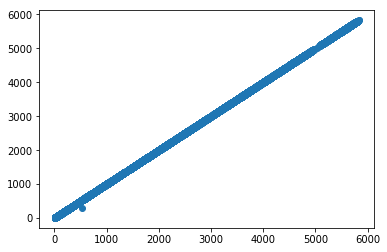

mean_absolute_error:
0.204233939574
mean_squared_error:
0.470649677888
root_mean_squared_error:
0.68603912271
[   10.50303933   114.7468412    595.0140233  ...,    87.99594123
   256.11264998  4816.8732834 ] 445497       10.510000
717674      114.750000
2480260     595.000000
1918610     232.720000
1830535     248.921562
1067014     807.998839
215440        5.070000
2950169    4190.029604
1990403     269.440000
2193515     404.090000
1583307     296.115005
2292248     456.590000
1712156     255.644990
665465      143.577621
140650        4.990000
2977023    4868.481730
2566259     727.003823
1056074     756.773754
982430      351.840000
1207950     495.240229
506311       13.270000
1479298     363.400000
1133050     492.968393
2958154    4024.860000
1637119     247.325111
2555445     691.150000
64813         5.003382
2615043     898.840000
1806643     229.268851
1240451     452.671795
              ...     
1458917     366.100779
940432      135.651140
24947         6.900000
2837796   

In [6]:
X=df[['Open', 'High',
       'Low', 'Volume_(BTC)', 'Volume_(Currency)']]

y=df['Weighted_Price']

#Importing packages and models for LR
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state=101)

from sklearn.linear_model import LinearRegression

# Simple Linear Regression application
lm = LinearRegression()

lm.fit(X_train,y_train)

print(lm.intercept_)

cdf = pd.DataFrame(lm.coef_,X.columns, columns =["Coeff"])

predictions = lm.predict(X_test)

#Graph plotting difference between expected(y-test) values and predicted(predictions) values
plt.scatter(y_test,predictions)
plt.show()

#Calculating error
from sklearn import metrics

print('mean_absolute_error:')
print(metrics.mean_absolute_error(y_test,predictions))

print('mean_squared_error:')
print(metrics.mean_squared_error(y_test,predictions))

print('root_mean_squared_error:')
print(np.sqrt(metrics.mean_squared_error(y_test,predictions)))
from sklearn.metrics import accuracy_score

print(predictions, y_test)

In [7]:

import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
get_ipython().magic(u'matplotlib inline')

In [8]:
def build_model(layers):
    model = Sequential()

    # By setting return_sequences to True we are able to stack another LSTM layer
    model.add(LSTM(
        input_dim=layers[0],
        output_dim=layers[1],
        return_sequences=True))
    model.add(Dropout(0.4))

    model.add(LSTM(
        layers[2],
        return_sequences=False))
    model.add(Dropout(0.3))

    model.add(Dense(
        output_dim=layers[3]))
    model.add(Activation("linear"))

    start = time.time()
    model.compile(loss="mse", optimizer="rmsprop", metrics=['accuracy'])
    print("Compilation Time : ", time.time() - start)
    return model


In [9]:

window = 20
X_train, y_train, X_test, y_test = preprocess_data(df[:: -1], window)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

NameError: name 'preprocess_data' is not defined